# Regresyon

### Basit Doğrusal Regresyon

In [2]:
# kütüphandeleri içeri aktarıyoruz
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#sklearn kütüphanesini içeri aktarıyoruz
from sklearn.linear_model import LinearRegression

In [3]:
# veriyi içe aktar
df = pd.read_csv("dogrusal_regresyon_veriseti_20220209.csv",sep=";")# veriler noktalı virgül ile ayrıldığı için sep=";" yazdık
df.head()
df.tail()

,deneyim,maas
9,2.0,3500
10,12.0,15000
11,10.0,13000
12,14.0,18000
13,6.0,7500


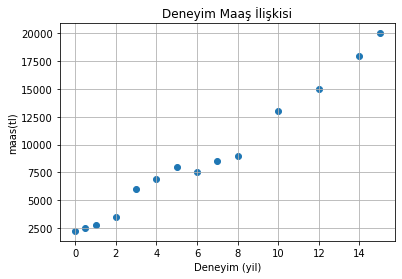

In [4]:
# veriyi görselleştiriyoruz
plt.scatter(df.deneyim,df.maas)
plt.xlabel("Deneyim (yil)")
plt.ylabel("maas(tl)")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

In [5]:
# Doğrusal Regresyon Modeli Eğitimi

# Doğrusal Regresyon Modeli
linear_reg = LinearRegression()

# data içerisinde bulunan maas ve deneyim sütunlarını numpy array'e çevir
x = df.deneyim.values.reshape(-1,1)
y = df.maas.values.reshape(-1,1)

# doğrusal regresyon eğitimi
linear_reg.fit(x,y)

LinearRegression()

In [6]:
# y ekseninin kestiği nokta intercept bulunması
y_ekseni_kesisim = np.array([0]).reshape(1,-1)
b0 = linear_reg.predict(y_ekseni_kesisim)
print("b0:",b0)

# y ekseni kestiği nokta (intercept)
b0_ = linear_reg.intercept_
print("b0_:",b0_)

# eğim(slope) bulunması
b1 = linear_reg.coef_
print("b1:",b1)

b0: [[1663.89519747]]
b0_: [1663.89519747]
b1: [[1138.34819698]]


In [7]:
# maas = 1663 + 1138*deneyim
# y eksenini kestiği nokta ve eğim göre doğrusal model oluşturulr

deneyim  = 11

# 11 yilik deneyim sahip birinin maaşı tahmin edilir
maas_yeni = 1663 + 1138*deneyim
print(maas_yeni)

maas_yeni2 = linear_reg.intercept_ + linear_reg.coef_*11
print(maas_yeni2)

# 11 yilik deneyime sahip birinin maasi predict metodu ile tahmin edilir
sonuc = linear_reg.predict(np.array([deneyim]).reshape(1,-1))
print("11 yilik deneyime sahip birinin maasi : {} TL".format(sonuc))

14181
[[14185.72536421]]
11 yilik deneyime sahip birinin maasi : [[14185.72536421]] TL


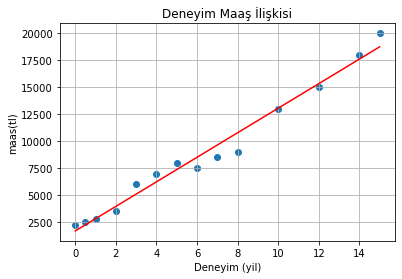

In [8]:
# doğrusal Regresyon Modeli ile Test/Tahmin/Görselleştirme
array = np.array([range(16)]).reshape(-1,1)

plt.figure()
plt.scatter(x,y)

# 0-15 yil arasında deneyime sahip insanalrın maası tahmin edilir
y_head = linear_reg.predict(array) # y_head = maas

plt.plot(array,y_head,color="red")
plt.xlabel("Deneyim (yil)")
plt.ylabel("maas(tl)")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

### Çoklu Doğrusal Regresyon

In [9]:
# Veriyi içeri aktar
df = pd.read_csv("coklu_dogrusal_regresyon_veriseti_20220209.csv",sep=";")
df.head()

,deneyim,maas,yas
0,0.5,2500,22
1,0.0,2250,21
2,1.0,2750,23
3,5.0,8000,25
4,8.0,9000,28


In [10]:
x = df.iloc[:,[0,2]].values # deneyim ve yaşı bağımsız değişkenler olarak aldık
x

array([[ 0.5, 22. ],
       [ 0. , 21. ],
       [ 1. , 23. ],
       [ 5. , 25. ],
       [ 8. , 28. ],
       [ 4. , 23. ],
       [15. , 35. ],
       [ 7. , 29. ],
       [ 3. , 22. ],
       [ 2. , 23. ],
       [12. , 32. ],
       [10. , 30. ],
       [14. , 34. ],
       [ 6. , 27. ]])

In [11]:
y = df.maas.values.reshape(-1,1) # maas'i bağımlı değişken olarak alalım
y

array([[ 2500],
       [ 2250],
       [ 2750],
       [ 8000],
       [ 9000],
       [ 6900],
       [20000],
       [ 8500],
       [ 6000],
       [ 3500],
       [15000],
       [13000],
       [18000],
       [ 7500]], dtype=int64)

### Çoklu Doğrusal Regresyon

In [12]:
# çoklu doğrusal regresyon modeli
coklu_dogrusal_regresyon = LinearRegression()

# doğrusal regresyon eğitimi
coklu_dogrusal_regresyon.fit(x,y)

LinearRegression()

In [13]:
# test 1
test_verisi1 = np.array([[10,35]]) # deneyim  = 10 ve yaş = 35
test_sonucu1 = coklu_dogrusal_regresyon.predict(test_verisi1)
print("10 yıllık deneyimi ve 35 yaş sonucu çıkan maaş:{} TL".format(test_sonucu1[0]))

10 yıllık deneyimi ve 35 yaş sonucu çıkan maaş:[11046.35815877] TL


In [14]:
# test 2
test_verisi2 = np.array([[5,35]]) # deneyim  = 10 ve yaş = 35
test_sonucu2 = coklu_dogrusal_regresyon.predict(test_verisi2)
print("10 yıllık deneyimi ve 35 yaş sonucu çıkan maaş:{} TL".format(test_sonucu2[0]))

10 yıllık deneyimi ve 35 yaş sonucu çıkan maaş:[3418.85455609] TL


# Polinomsal Regresyon

In [15]:
# kütüphaneleri içeri aktar
import pandas as pd
import matplotlib.pyplot as plt

# sklearn kütüphanesini içeri aktar
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [16]:
df = pd.read_csv("polinomsal_regresyon_veriseti_20220209.csv", sep=";")
df.head()

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [17]:
# sklearn input olarak genelde numpy kabul eder
y = df.araba_max_hiz.values.reshape(-1,1) # numpy arraya çevir
x = df.araba_fiyat.values.reshape(-1,1)

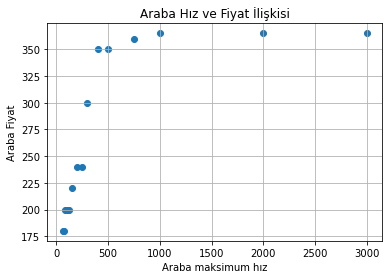

In [18]:
# veriyi görselleştie
plt.scatter(x,y)
plt.xlabel("Araba maksimum hız")
plt.ylabel("Araba Fiyat")
plt.title("Araba Hız ve Fiyat İlişkisi")
plt.grid(True)
plt.show()

In [19]:
# doğrusal regresyon modeli eğitimi
lr = LinearRegression()
# doğrusal regresyon eğitimi
lr.fit(x,y)

LinearRegression()

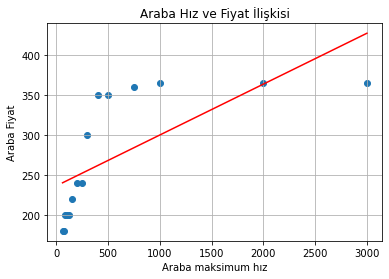

10 milyon tl lik araba hiz tahmini: [[871.66401826]]


In [20]:
#%% Tahmin
y_tahmin = lr.predict(x)

plt.scatter(x,y)
plt.plot(x,y_tahmin,color="red")
plt.xlabel("Araba maksimum hız")
plt.ylabel("Araba Fiyat")
plt.title("Araba Hız ve Fiyat İlişkisi")
plt.grid(True)
plt.show()

araba_fiyatı = 10000
print("10 milyon tl lik araba hiz tahmini:",lr.predict((np.array([araba_fiyatı]).reshape(-1,1))))

In [21]:
# polinomsal özellikler
polinom_regresyon = PolynomialFeatures(degree=4) # 4. dereceden polinom

x_polinom = polinom_regresyon.fit_transform(x)
x_polinom

array([[1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07],
       [1.0000000e+00, 7.0000000e+01, 4.9000000e+03, 3.4300000e+05,
        2.4010000e+07],
       [1.0000000e+00, 8.0000000e+01, 6.4000000e+03, 5.1200000e+05,
        4.0960000e+07],
       [1.0000000e+00, 1.0000000e+02, 1.0000000e+04, 1.0000000e+06,
        1.0000000e+08],
       [1.0000000e+00, 1.2000000e+02, 1.4400000e+04, 1.7280000e+06,
        2.0736000e+08],
       [1.0000000e+00, 1.5000000e+02, 2.2500000e+04, 3.3750000e+06,
        5.0625000e+08],
       [1.0000000e+00, 2.0000000e+02, 4.0000000e+04, 8.0000000e+06,
        1.6000000e+09],
       [1.0000000e+00, 2.5000000e+02, 6.2500000e+04, 1.5625000e+07,
        3.9062500e+09],
       [1.0000000e+00, 3.0000000e+02, 9.0000000e+04, 2.7000000e+07,
        8.1000000e+09],
       [1.0000000e+00, 4.0000000e+02, 1.6000000e+05, 6.4000000e+07,
        2.5600000e+10],
       [1.0000000e+00, 5.0000000e+02, 2.5000000e+05, 1.2500000e+08,
        6.25

In [22]:
#%% polinomsal regresyon eğitebilmek için polinomsal özellikler ile
lr2 = LinearRegression()
lr2.fit(x_polinom,y)

LinearRegression()

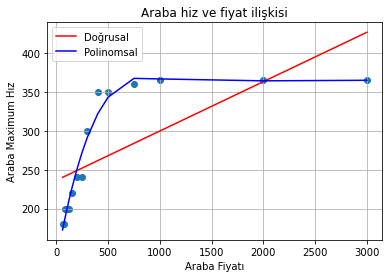

In [23]:
# tahmin
y_tahmin2 = lr2.predict(x_polinom)

plt.scatter(x,y)
plt.plot(x,y_tahmin,color="red",label = "Doğrusal")
plt.plot(x,y_tahmin2,color="blue",label = "Polinomsal")
plt.legend()
plt.xlabel("Araba Fiyatı")
plt.ylabel("Araba Maximum Hız")
plt.title("Araba hiz ve fiyat ilişkisi")
plt.grid(True)
plt.show()

### R2 Score

In [24]:
# kütüphaneler içeri aktar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# sklearn kütüphanesini içeri aktar
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score # r^2 kare score

In [25]:
# veriyi içe aktar
df = pd.read_csv("dogrusal_regresyon_veriseti_20220209.csv",sep=";")# veriler noktalı virgül ile ayrıldığı için sep=";" yazdık
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


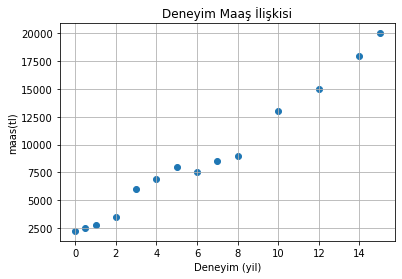

In [26]:
# veriyi görselleştiriyoruz
plt.scatter(df.deneyim,df.maas)
plt.xlabel("Deneyim (yil)")
plt.ylabel("maas(tl)")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

In [27]:
# Doğrusal Regresyon Modeli
linear_reg = LinearRegression()

# data içerisinde bulunan maas ve deneyim sütunlarını numpy array'e çevir
x = df.deneyim.values.reshape(-1,1)
y = df.maas.values.reshape(-1,1)

# doğrusal regresyon eğitimi
linear_reg.fit(x,y)

LinearRegression()

In [28]:
# polinomsal Regresyon Modeli Eğitimi
polinom_regresyon = PolynomialFeatures(degree=2)# 2.dereceden polinom

x_polinom = polinom_regresyon.fit_transform(x)

# %% polinomsal regresyon eğitebilmek için polinomsal özellikler ile
poly_reg = LinearRegression()
poly_reg.fit(x_polinom,y)

LinearRegression()

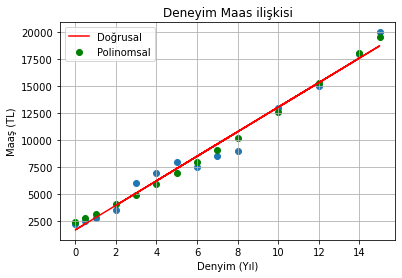

In [29]:
# test
y_tahmin_linear = linear_reg.predict(x)
y_tahmin_poly = poly_reg.predict(x_polinom)

plt.scatter(df.deneyim,df.maas)
plt.plot(x,y_tahmin_linear,color="red",label = "Doğrusal")
plt.scatter(x,y_tahmin_poly,color="green",label = "Polinomsal")
plt.legend()
plt.xlabel("Denyim (Yıl)")
plt.ylabel("Maaş (TL)")
plt.title("Deneyim Maas ilişkisi")
plt.grid(True)
plt.show()

In [30]:
print("Doğrusal Regresyon R kare: {}",r2_score(y,y_tahmin_linear))
print("Polinomal Regresyon R kare: {}",r2_score(y,y_tahmin_poly))

Doğrusal Regresyon R kare: {} 0.9775283164949902
Polinomal Regresyon R kare: {} 0.9854449464578782


# Sınıflandırma

In [31]:
# kütüphaneyi içe aktar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# uyarıları kapat
import warnings
warnings.filterwarnings("ignore")

In [32]:
# veriyi içeri aktar
data = pd.read_csv("ortopedik_hastalarin_biyomekanik_ozellikleri_20220209.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


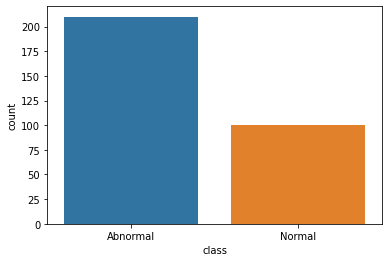

In [33]:
# hangi sınıfların olduğunu görselleştir
sns.countplot(data["class"]) # Abnormal ve Normal olmak üzere 2 tane sınıf vardır
plt.show()

In [34]:
# sınıf etiketlerinin 1 ve 0 olmak üzere iki katagoride etiketliyoruz
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [35]:
# tamemen sayısal değişkenlerden oluşan bir veriye sahibiz
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


In [36]:
y = data["class"].values # sınıfları y değişkeninin içerisine koyalım
x_data = data.drop(["class"],axis=1) # özellikleri x_data içerisine koyalım
x_data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


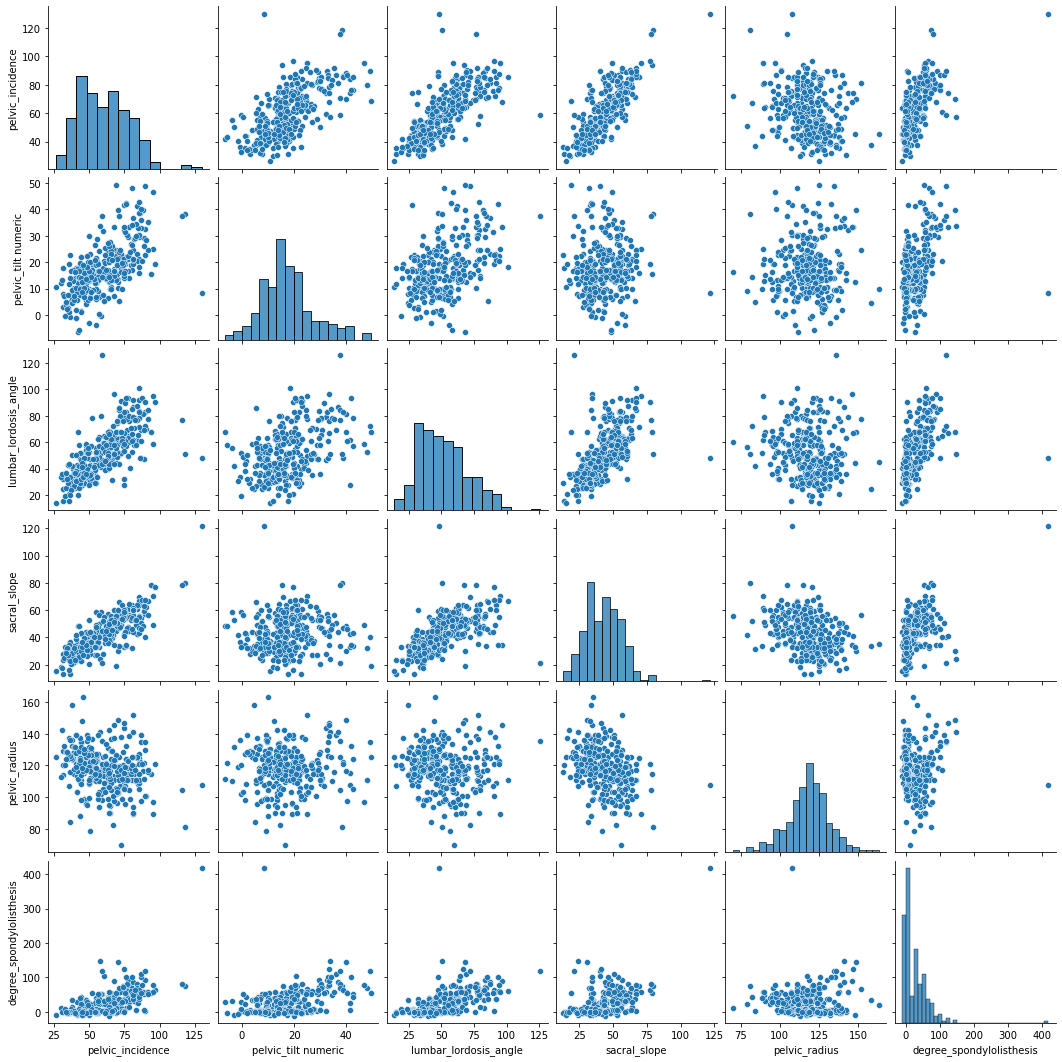

In [37]:
# verilerin içersinde bulunan özelliklerin birbiri ile ilişkisini yorumlamak için çizdiriyoruz
sns.pairplot(x_data)
plt.show()

### Veriyi Normalize Etmek

In [38]:
# normalizasyon
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values
# standardizasyon


### Eğitim/Test Bölünmesi

In [39]:
# Eğitim Test Bölünmesi
from sklearn.model_selection import train_test_split

In [40]:
# %15 test %85 eğitim
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42)

# Transpose alıyoruz
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (6, 263)
x_test: (6, 47)
y_train: (263,)
y_test: (47,)


## Logistic Regression

In [41]:
# sklearn kütüphanesini içe aktar
from sklearn.linear_model import LogisticRegression

In [42]:
# eğitim
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)

LogisticRegression()

In [43]:
# test
test_dogrulugu = lr.score(x_test.T,y_test.T)
print("Test Doğruluğu:{}".format(test_dogrulugu))

Test Doğruluğu:0.7872340425531915


## K-En Yakın Komşu

In [44]:
# kütüphaneleri içeri aktar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [45]:
# veriyi içeri aktar
data = pd.read_csv("ortopedik_hastalarin_biyomekanik_ozellikleri_20220209.csv")
data.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal


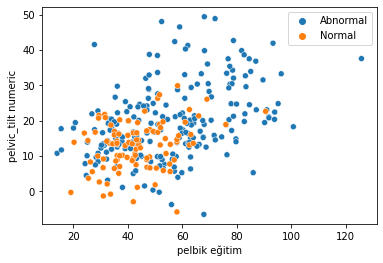

In [46]:
sns.scatterplot(data=data,x="lumbar_lordosis_angle",y="pelvic_tilt numeric",hue="class")
plt.xlabel("lomber lordoz açısı")
plt.xlabel("pelbik eğitim")
plt.legend()
plt.show()

In [47]:
# sınıf etiketlerinin 1 ve 0 olmak üzere iki katagoride etiketliyoruz
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1


In [48]:
y = data["class"].values # sınıfları y değişkeninin içerisine koyalım
x_data = data.drop(["class"],axis=1) # özellikleri x_data içerisine koyalım
x_data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [49]:
# normalization
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [50]:
# eğitim test bölünmesi
from sklearn.model_selection import train_test_split
# %15 test %85 eğitim
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=1)

### K-En Yakın Komşu Algoritması Eğitimi ve Testi

In [51]:
# knn model
from sklearn.neighbors import KNeighborsClassifier
komsu_sayisi = 5
knn = KNeighborsClassifier(n_neighbors=komsu_sayisi)
knn.fit(x_train,y_train)

prediction = knn.predict(x_test)
print(" {} En Yakın Komşu Modeli Test Doğruluk:{}".format(komsu_sayisi,knn.score(x_test,y_test)))

 5 En Yakın Komşu Modeli Test Doğruluk:0.723404255319149


### En İyi K Değerinin Bulunması

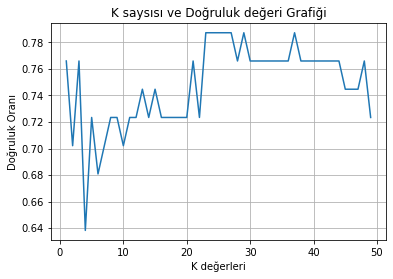

In [52]:
score_list = []
for each in range(1,50):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,50),score_list)
plt.xlabel("K değerleri")
plt.ylabel("Doğruluk Oranı")
plt.title("K saysısı ve Doğruluk değeri Grafiği")
plt.grid(True)
plt.show()

## Destek Vektör Makinası

In [53]:
# kütüphane içe aktar
import pandas as pd
import numpy as np

In [54]:
# veriyi içeri aktar
data = pd.read_csv("ortopedik_hastalarin_biyomekanik_ozellikleri_20220209.csv")
data.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal


In [55]:
# sınıf etiketlerinin 1 ve 0 olmak üzere iki katagoride etiketliyoruz
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1


In [56]:
y = data["class"].values # sınıfları y değişkeninin içerisine koyalım
x_data = data.drop(["class"],axis=1) # özellikleri x_data içerisine koyalım
x_data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [57]:
# normalization
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [58]:
# eğitim test bölünmesi
from sklearn.model_selection import train_test_split
# %15 test %85 eğitim
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=1)

### Destek Vektör Makinesi Algoritmasının Eğitimi Ve Testi

In [59]:
# destek vekrör makinesi içe aktar
from sklearn.svm import SVC

# desktek vekötor makinesi Eğitimi
svm = SVC(random_state=1)
svm.fit(x_train,y_train)

# test
print("Desktek vekötör Makinesi Model Doğruluk Oranı:{}".format(svm.score(x_test,y_test)))

Desktek vekötör Makinesi Model Doğruluk Oranı:0.7872340425531915


## Karar Ağacı

In [60]:
# kütüphane içe aktar
import pandas as pd
import numpy as np

In [61]:
# veriyi içeri aktar
data = pd.read_csv("ortopedik_hastalarin_biyomekanik_ozellikleri_20220209.csv")
data.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal


In [62]:
# sınıf etiketlerinin 1 ve 0 olmak üzere iki katagoride etiketliyoruz
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1


In [63]:
y = data["class"].values # sınıfları y değişkeninin içerisine koyalım
x_data = data.drop(["class"],axis=1) # özellikleri x_data içerisine koyalım
x_data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [64]:
# normalization
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [65]:
# eğitim test bölünmesi
from sklearn.model_selection import train_test_split
# %15 test %85 eğitim
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=1)

### Karar Ağacı Algoritmasının Eğitimi ve Testi

In [66]:
# karar ağacı içeri aktar
from sklearn.tree import DecisionTreeClassifier

# karar ağacı Eğitimi
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("Karar Ağacı Modeli Test Doğruluk: {}".format(dt.score(x_test,y_test)))

Karar Ağacı Modeli Test Doğruluk: 0.851063829787234


## Rastgele Orman

In [67]:
# kütüphane içe aktar
import pandas as pd
import numpy as np

In [68]:
# veriyi içeri aktar
data = pd.read_csv("ortopedik_hastalarin_biyomekanik_ozellikleri_20220209.csv")
data.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal


In [69]:
# sınıf etiketlerinin 1 ve 0 olmak üzere iki katagoride etiketliyoruz
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1


In [70]:
y = data["class"].values # sınıfları y değişkeninin içerisine koyalım
x_data = data.drop(["class"],axis=1) # özellikleri x_data içerisine koyalım
x_data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [71]:
# normalization
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [72]:
# eğitim test bölünmesi
from sklearn.model_selection import train_test_split
# %15 test %85 eğitim
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=1)

## Rastgele Orman Algoritması Eğitimi Ve Testi

In [73]:
# rastgele orman içe aktar
from sklearn.ensemble import RandomForestClassifier

# rasgele orman eğitimi
rf = RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)

print("rastgele orman algoritması test doğruluk: {}".format(dt.score(x_test,y_test)))

rastgele orman algoritması test doğruluk: 0.851063829787234


# Sınıflandırma Algoritmalarının Değerlendirilmesi

### Confusion Matrix

In [74]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[14,  3],
       [ 3, 27]], dtype=int64)

### Sıcaklık Haritası

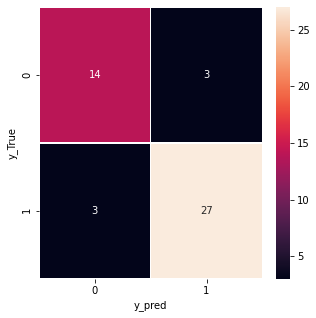

In [75]:
# sıcaklık haritası
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="white",fmt=".0f",ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_True")
plt.show()

## Kümeleme

### K-Ortalama(K-Means) Algoritması

Veri Seti Oluşturma

Oluşturduğumuz küme içerisisinde 3 Ayrı küme bulunacak

In [76]:
# kütüphaneleri içeri aktar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
# veri seti oluşturma

# küme 1
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)

# küme 2
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

# küme 3
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

x = np.concatenate((x1,x2,x3),axis=0)
y = np.concatenate((y1,y2,y3),axis=0)

dictionary = {"x":x,"y":y}

data = pd.DataFrame(dictionary)
data.head()

,x,y
0,30.907488,26.206807
1,29.265451,18.653984
2,23.572789,27.276792
3,30.344675,27.819548
4,20.286754,21.666846


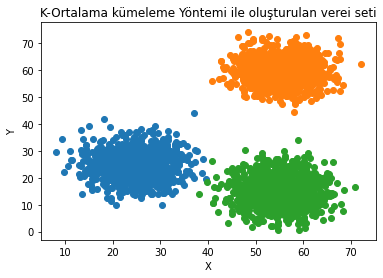

In [78]:
plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("K-Ortalama kümeleme Yöntemi ile oluşturulan verei seti")
plt.show()

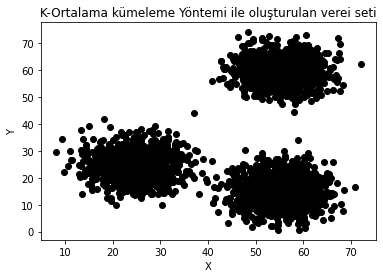

In [79]:
# K-ortalama algoritması veriyi böyle görecek
plt.figure()
plt.scatter(x1,y1,color="black")
plt.scatter(x2,y2,color="black")
plt.scatter(x3,y3,color="black")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("K-Ortalama kümeleme Yöntemi ile oluşturulan verei seti")
plt.show()

#### K Değeri Seçimi

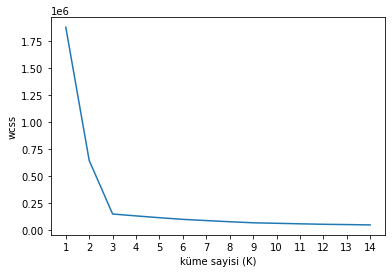

In [80]:
# K-Ortalamayı içeri Aktar
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.figure()
plt.plot(range(1,15),wcss)
plt.xticks(range(1,15))
plt.xlabel("küme sayisi (K)")
plt.ylabel("wcss")
plt.show()

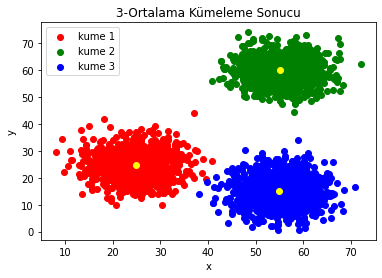

In [81]:
k_ortalama = KMeans(n_clusters=3)
kumeler = k_ortalama.fit_predict(data)

data["label"] = kumeler

plt.figure()
plt.scatter(data.x[data.label == 0], data.y[data.label == 0],color="red",label="kume 1")
plt.scatter(data.x[data.label == 1], data.y[data.label == 1],color="green",label="kume 2")
plt.scatter(data.x[data.label == 2], data.y[data.label == 2],color="blue",label="kume 3")

plt.scatter(k_ortalama.cluster_centers_[:,0],k_ortalama.cluster_centers_[:,1],color="yellow")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("3-Ortalama Kümeleme Sonucu")
plt.show()

## Hiyerarşik Kümeleme

In [82]:
# kütüphaneleri içeri aktar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
# veri seti oluşturma

# küme 1
x1 = np.random.normal(25,5,20)
y1 = np.random.normal(25,5,20)

# küme 2
x2 = np.random.normal(55,5,20)
y2 = np.random.normal(60,5,20)

# küme 3
x3 = np.random.normal(55,5,20)
y3 = np.random.normal(15,5,20)

x = np.concatenate((x1,x2,x3),axis=0)
y = np.concatenate((y1,y2,y3),axis=0)

dictionary = {"x":x,"y":y}

data = pd.DataFrame(dictionary)
data.head()

,x,y
0,28.585934,22.977694
1,33.552698,30.632091
2,25.293179,18.607777
3,24.453290,18.517618
4,20.306863,22.675968


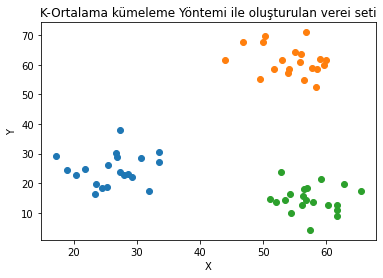

In [84]:
plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("K-Ortalama kümeleme Yöntemi ile oluşturulan verei seti")
plt.show()

#### Dendogram Gösterimi

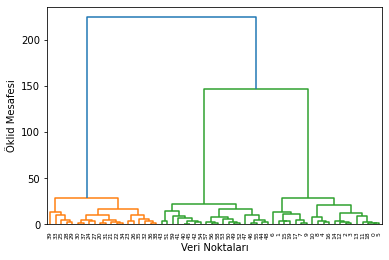

In [85]:
# dendogram
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("Veri Noktaları")
plt.ylabel("Öklid Mesafesi")
plt.show()

### Hierarşik Kümeleme Algoritması Eğitimi ve Testi

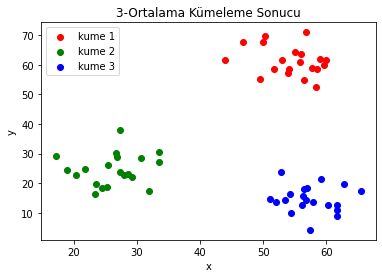

In [86]:
from sklearn.cluster import AgglomerativeClustering

hiyerarsi_kume = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
kume = hiyerarsi_kume.fit_predict(data)

data["label"] = kume

plt.figure()
plt.scatter(data.x[data.label == 0], data.y[data.label == 0],color="red",label="kume 1")
plt.scatter(data.x[data.label == 1], data.y[data.label == 1],color="green",label="kume 2")
plt.scatter(data.x[data.label == 2], data.y[data.label == 2],color="blue",label="kume 3")
plt.legend()

plt.xlabel("x")
plt.ylabel("y")
plt.title("3-Ortalama Kümeleme Sonucu")
plt.show()

## Temel Bileşen Analizi(PCA)

Veri Seti Tanıma

In [87]:
# kütüphaneleri içeri aktar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn iris dataset
from sklearn.datasets import load_iris

In [88]:
# veriyi yükle
iris = load_iris()

data = iris.data
feature_names = iris.feature_names
y = iris.target

df = pd.DataFrame(data,columns=feature_names)
df["sinif"] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sinif
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Temel Bileşen Analizi Uygulaması

In [89]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2,whiten=True) # whiten = normalize
pca.fit(data)

x_pca = pca.transform(data)

print("Variance ratio:",pca.explained_variance_ratio_)

print("sum:",sum(pca.explained_variance_ratio_))

Variance ratio: [0.92461872 0.05306648]
sum: 0.977685206318795


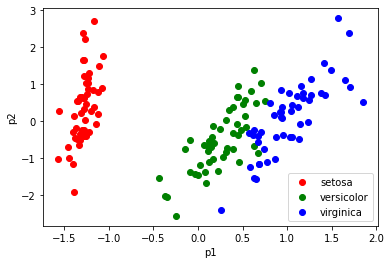

In [92]:
# Temel bileşenleri Görseleştirelim

df["p1"] = x_pca[:,0]
df["p2"] = x_pca[:,1]

color = ["red","green","blue"]

for each in range(3):
    plt.scatter(df.p1[df.sinif == each],df.p2[df.sinif == each],color = color[each],label=iris.target_names[each])
    
plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()

## PCA-Kernel PCA

PCA ve Kernel PCA Karşılaştırma Örnegi

In [93]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X,y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=0)

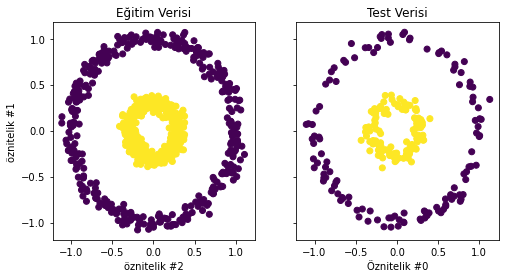

In [98]:
import matplotlib.pyplot as plt

_,(train_ax,test_ax) = plt.subplots(ncols=2,sharex=True,sharey=True,figsize=(8,4))

train_ax.scatter(X_train[:,0],X_train[:,1],c=y_train)
train_ax.set_ylabel("öznitelik #1")
train_ax.set_xlabel("öznitelik #2")
train_ax.set_title("Eğitim Verisi")

test_ax.scatter(X_test[:,0],X_test[:,1],c=y_test)
test_ax.set_xlabel("Öznitelik #0")
_ = test_ax.set_title("Test Verisi")

In [100]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf",gamma=10, fit_inverse_transform=True,alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_test).transform(X_test)

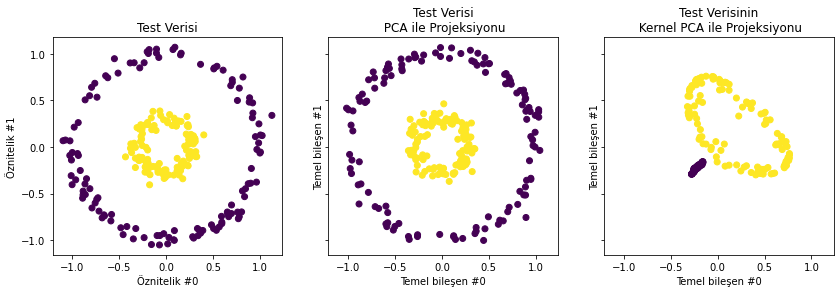

In [104]:
fig,(orig_data_ax,pca_proj_ax,kernel_pca_proj_ax) = plt.subplots(ncols=3,sharex=True,sharey=True,figsize=(14,4))

orig_data_ax.scatter(X_test[:,0],X_test[:,1],c= y_test)
orig_data_ax.set_ylabel("Öznitelik #1")
orig_data_ax.set_xlabel("Öznitelik #0")
orig_data_ax.set_title("Test Verisi")

pca_proj_ax.scatter(X_test_pca[:,0],X_test_pca[:,1],c= y_test)
pca_proj_ax.set_ylabel("Temel bileşen #1")
pca_proj_ax.set_xlabel("Temel bileşen #0")
pca_proj_ax.set_title("Test Verisi\n PCA ile Projeksiyonu")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:,0],X_test_kernel_pca[:,1],c= y_test)
kernel_pca_proj_ax.set_ylabel("Temel bileşen #1")
kernel_pca_proj_ax.set_xlabel("Temel bileşen #0")
_ = kernel_pca_proj_ax.set_title("Test Verisinin\n Kernel PCA ile Projeksiyonu")

### PCA ve KernelPCA'yi Geri Döndürme

In [105]:
#reconstruction - geri oluşturma
x_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
x_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

Text(0.5, 1.0, 'Test Verisi')

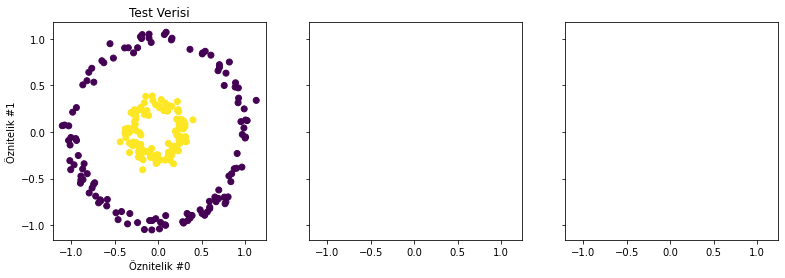

In [108]:
fig,(orig_data_ax,pca_proj_ax,kernel_pca_backk_proj_ax) = plt.subplots(ncols=3,sharex=True,sharey=True,figsize=(13,4))

orig_data_ax.scatter(X_test[:,0],X_test[:,1],c= y_test)
orig_data_ax.set_ylabel("Öznitelik #1")
orig_data_ax.set_xlabel("Öznitelik #0")
orig_data_ax.set_title("Test Verisi")


# Feature Selection

#### Varyans Temelli Öznitelik Seçimi

In [110]:
from sklearn.feature_selection import VarianceThreshold
X = [[0,0,1],
    [0,1,0],
    [1,0,0],
    [0,1,1],
    [0,1,0],
    [0,1,1]]
X

[[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]

In [112]:
sel = VarianceThreshold(threshold=(0.8*(1-0.8))) # Var(X) = p(1-p)
sel.fit_transform(X)

# ilk sütunun elenmesini bekliyoruz
# zira orada 0 değeri olma olasılığı 5/6 > 0.8

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

#### İstatiksel Model Seşimi

In [113]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X,y = load_iris(return_X_y=True)
X.shape

(150, 4)

#### Model temeli Öznitelik Seçimi

In [115]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X,y = load_iris(return_X_y=True)
X.shape

(150, 4)

#### L1 normu Temelli Öznitelik Seçimi

In [117]:
lsvc = LinearSVC(C = 0.01,penalty="l1", dual=False).fit(X,y)
model = SelectFromModel(lsvc,prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 3)

#### L2 normu Temelli Öznitelik Seçimi

In [118]:
lsvc = LinearSVC(C = 0.01,penalty="l2", dual=False).fit(X,y)
model = SelectFromModel(lsvc,prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 2)

#### Ağaç Temelli Öznitelik Seçimi

In [120]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X,y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [121]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X,y)
clf.feature_importances_

array([0.08465072, 0.06760806, 0.36852859, 0.47921263])

In [122]:
model = SelectFromModel(clf,prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 2)

# Model Seçimi

#### Veri Seti Tanıma Ve Ön İşlemler

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn iris dataset
from sklearn.datasets import load_iris

In [124]:
# veri yükle
iris = load_iris()

x = iris.data # özellikler
y = iris.target # sınıf

In [125]:
# normalizasyon
x = (x-np.min(x))/(np.max(x)-np.min(x))

In [126]:
# eğtim test bölünmesi
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

### Çapraz Doğrulama ile Model Seçimi

In [127]:
# 3 en yakın komşu
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn

KNeighborsClassifier(n_neighbors=3)

In [133]:
# 10 fold çapraz doğrulama yapalım
from sklearn.model_selection import cross_val_score
fold_sayisi = 10
dogruluklar = cross_val_score(estimator=knn,X = x_train,y= y_train,cv=fold_sayisi)
print(dogruluklar)
print("Ortalama Doğruluk:",np.mean(dogruluklar))
print("Doğrulukların Standart Sapması:",np.std(dogruluklar))

[1.         1.         0.90909091 1.         1.         0.9
 0.9        0.8        0.9        1.        ]
Ortalama Doğruluk: 0.940909090909091
Doğrulukların Standart Sapması: 0.06583852021272692


### Izgara Araması Çapraz Doğrulama

#### Veri Seti Tanıma Ve Ön İşlemler

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn iris dataset
from sklearn.datasets import load_iris

In [135]:
# veri yükle
iris = load_iris()

x = iris.data # özellikler
y = iris.target # sınıf

In [136]:
# normalizasyon
x = (x-np.min(x))/(np.max(x)-np.min(x))

In [137]:
# eğtim test bölünmesi
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

#### Izgara Araması Çapraz Doğrulama Uygulama

In [138]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [139]:
from sklearn.model_selection import GridSearchCV

grid = {"n_neighbors":np.arange(1,50)}
knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, grid, cv = 10)
knn_cv.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [140]:
print("En iyi K değeri: ",knn_cv.best_params_)
print("En iyi K değerine göre en iyi doğruluk değri:",knn_cv.best_score_)

En iyi K değeri:  {'n_neighbors': 13}
En iyi K değerine göre en iyi doğruluk değri: 0.9800000000000001


#### Lojistik Regresyon için Deniyoruz

In [145]:
from sklearn.linear_model import LogisticRegression

grid = {"C":np.logspace(-3,3,7),"penalty":["l1","l2"]}

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,grid,cv = 10)
logreg_cv.fit(x,y)

print("En iyi K değeri: ",logreg_cv.best_params_)
print("En iyi K değerine göre en iyi doğruluk değri:",logreg_cv.best_score_)

En iyi K değeri:  {'C': 1000.0, 'penalty': 'l2'}
En iyi K değerine göre en iyi doğruluk değri: 0.9800000000000001
